https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import datetime
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
circuits = pd.read_csv('circuits.csv')
constructor_results = pd.read_csv('constructor_results.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
constructors = pd.read_csv('constructors.csv')
driver_standings = pd.read_csv('driver_standings.csv')
drivers = pd.read_csv('drivers.csv')
lap_times = pd.read_csv('lap_times.csv')
pit_stops = pd.read_csv('pit_stops.csv')
qualifying = pd.read_csv('qualifying.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
seasons = pd.read_csv('seasons.csv')
sprint_results = pd.read_csv('sprint_results.csv')
status = pd.read_csv('status.csv')

In [4]:
age_distro = results[['resultId', 'raceId', 'driverId', 'position']].merge(races[['raceId', 'date']], on='raceId')

In [5]:
age_distro = age_distro.merge(drivers[['driverId', 'dob']], left_on='driverId', right_on='driverId')


In [6]:
age_distro.date = pd.to_datetime(age_distro.date)
age_distro.dob = pd.to_datetime(age_distro.dob)

In [7]:
def age_calc(row):
    adjust = 0
    if (row.date.month, row.date.day) < (row.dob.month, row.dob.day):
        adjust = 1
    return row.date.year - row.dob.year - adjust

In [8]:
age_distro['race_age'] = age_distro.apply(lambda row: age_calc(row), axis=1)
age_distro['decade'] = age_distro.apply(lambda row: str(row['date'].year)[:-1] + '0s', axis=1)

In [9]:
age_distro = age_distro.sort_values(by='decade')

In [10]:
# facet grid with decades
# sns.displot(age_distro, x='race_age', row='decade', row_order=['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2020s'], **{'stat':'count', 'kde' : True, 'discrete' : True})

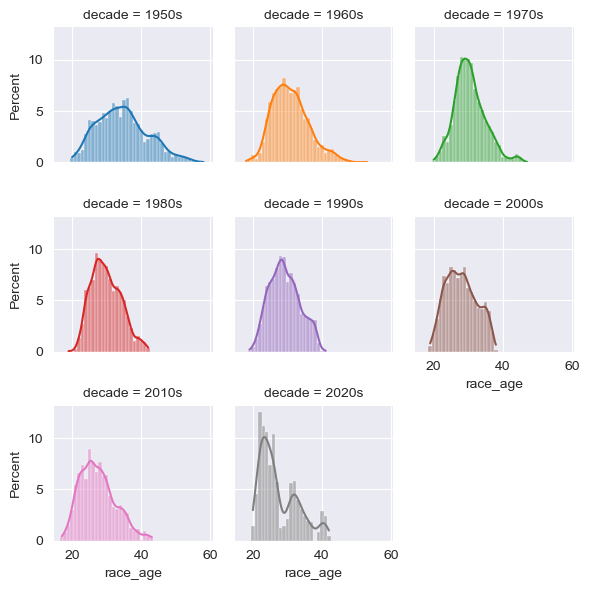

In [11]:
age_grid = sns.FacetGrid(age_distro, col = 'decade', col_wrap=3, hue = 'decade', height = 2)
age_grid.map(sns.histplot, 'race_age', **{'stat':'percent', 'discrete':True, 'kde':True})

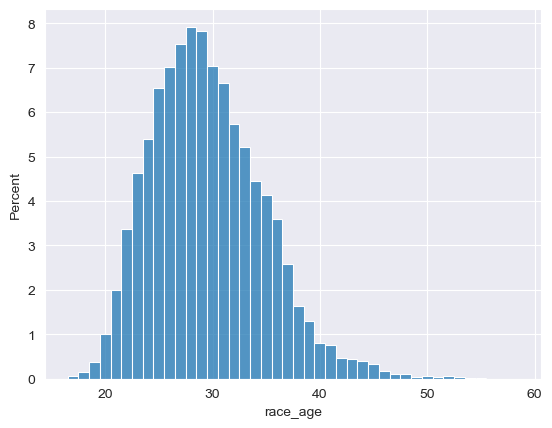

In [12]:
race_age_distro = sns.histplot(age_distro, x='race_age', stat='percent', discrete=True)

In [13]:
win_distro = age_distro[age_distro.position != '\\N']
win_distro = win_distro.astype({'position':'int'})
win_distro = win_distro[win_distro.position <= 1]


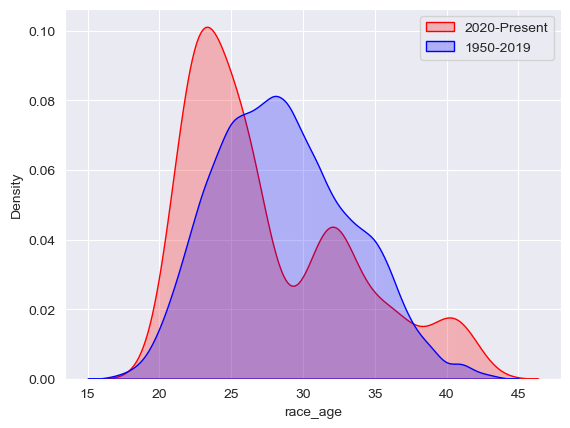

In [14]:
year_threshold = 2021
sns.kdeplot(data=age_distro[age_distro.date.dt.year>=year_threshold], x='race_age', label ='2020-Present', color='red', fill=True)
sns.kdeplot(data=age_distro[((age_distro.date.dt.year<year_threshold) & (age_distro.date.dt.year>1980))], x='race_age', label ='1950-2019', color='blue', fill=True)
# sns.kdeplot(age_distro, x='race_age', stat='percent', discrete=True, label = 'Races', kde=True)
plt.legend()

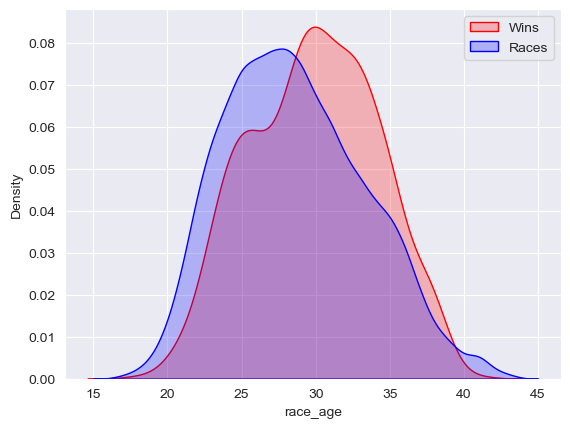

In [16]:
start_year = 1980
sns.kdeplot(data=win_distro[win_distro.date.dt.year>=start_year], x='race_age', label ='Wins', color='red', fill=True)
sns.kdeplot(data=age_distro[age_distro.date.dt.year>=start_year], x='race_age', label ='Races', color='blue', fill=True)
# sns.kdeplot(age_distro, x='race_age', stat='percent', discrete=True, label = 'Races', kde=True)
plt.legend()